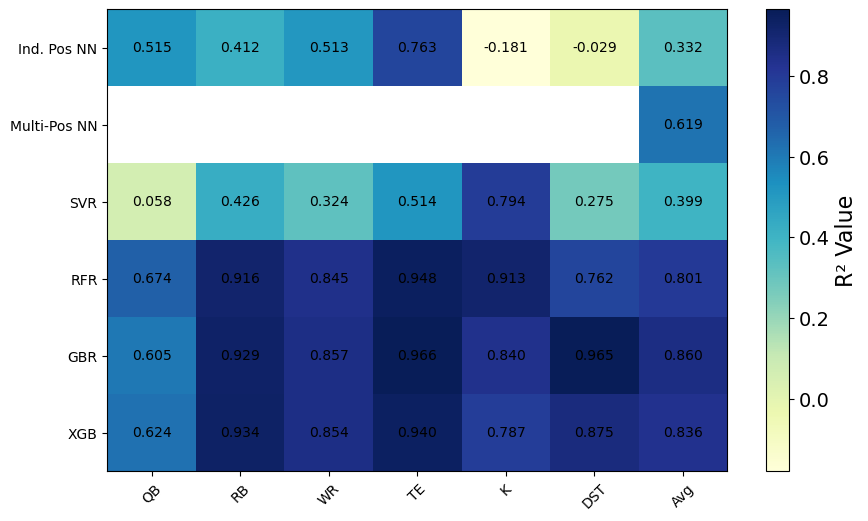

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create DataFrame
r2_data = {
    'Model': ['Ind. Pos NN', 'Multi-Pos NN', 'SVR', 'RFR', 'GBR', 'XGB'],
    'QB': [0.515, np.nan, 0.058, 0.674, 0.605, 0.624],
    'RB': [0.412, np.nan, 0.426, 0.916, 0.929, 0.934],
    'WR': [0.513, np.nan, 0.324, 0.845, 0.857, 0.854],
    'TE': [0.763, np.nan, 0.514, 0.948, 0.966, 0.940],
    'K':  [-0.181, np.nan, 0.794, 0.913, 0.840, 0.787],
    'DST':[-0.029, np.nan, 0.275, 0.762, 0.965, 0.875],
    'Avg': [0.332, 0.619, 0.399, 0.801, 0.860, 0.836]
}
r2_df = pd.DataFrame(r2_data)
r2_df.set_index('Model', inplace=True)

# Plot heatmap
fig, ax = plt.subplots(figsize=(10,6))
cax = ax.imshow(r2_df.values, cmap='YlGnBu', aspect='auto')

# Add grid and labels
ax.set_xticks(np.arange(r2_df.shape[1]))
ax.set_yticks(np.arange(r2_df.shape[0]))
ax.set_xticklabels(r2_df.columns)
ax.set_yticklabels(r2_df.index)

# Rotate x labels
plt.xticks(rotation=45)

# Annotate each cell with the value
for i in range(r2_df.shape[0]):
    for j in range(r2_df.shape[1]):
        val = r2_df.iloc[i,j]
        if not np.isnan(val):
            ax.text(j, i, f"{val:.3f}", ha='center', va='center')

# Colorbar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('R² Value', fontsize=16)  
cbar.ax.tick_params(labelsize=14)       

plt.show()



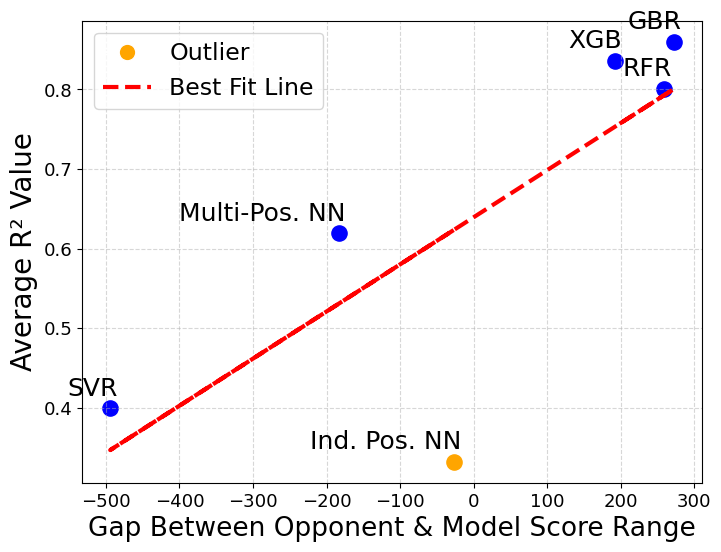

In [19]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

x_values = [-27.2, -183.7, -494.2, 259.2, 272.2, 192.2]
y_values = [0.332, 0.619, 0.399, 0.801, 0.860, 0.836]
labels   = ["Ind. Pos. NN", "Multi-Pos. NN", "SVR", "RFR", "GBR", "XGB"]

x = np.array(x_values)
y = np.array(y_values)

# Line of best fit
coeffs = np.polyfit(x, y, 1)
fit_line = np.poly1d(coeffs)

# Detect outliers
residuals = y - fit_line(x)
std_resid = np.std(residuals)
outlier_idx = [i for i, r in enumerate(residuals) if abs(r) > 2*std_resid]

plt.figure(figsize=(8,6))

# Plot points
for i, (xi, yi) in enumerate(zip(x, y)):
    color = 'orange' if i in outlier_idx else 'blue'
    plt.scatter(xi, yi, color=color, s=120)
    plt.text(xi + 10, yi + 0.01, labels[i], fontsize=18, ha='right', va='bottom', color="black")

# Plot line of best fit
plt.plot(x, fit_line(x), color='red', linestyle='--', linewidth=3)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Outlier', markerfacecolor='orange', markersize=12),
    Line2D([0], [0], color='red', lw=3, linestyle='--', label='Best Fit Line')
]
plt.legend(handles=legend_elements, fontsize=17)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Gap Between Opponent & Model Score Range", fontsize = 19)
plt.ylabel("Average R² Value", fontsize = 20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
